In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
# def apply_clahe(image_path, output_path, clip_limit=2.0, tile_grid_size=(8, 8)):
#     # Read the image
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#     # Create a CLAHE object
#     clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

#     # Apply CLAHE to the image
#     clahe_img = clahe.apply(img)

#     # Save the enhanced image
#     cv2.imwrite(output_path, clahe_img)

# # Example usage:
# input_image_path = 'path/to/your/image.jpg'
# output_image_path = 'path/to/your/output_image.jpg'

# apply_clahe(input_image_path, output_image_path)


In [11]:
def apply_clahe_rgb(image_path,red=True,green=False,blue=False, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Read the RGB image
    img = cv2.imread(image_path)

    # Convert the image to LAB color space
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # print(img)
    # Split the LAB image into L, A, and B channels
    r_channel, g_channel, b_channel = cv2.split(rgb_img)

    # Apply CLAHE to the channels
    clahe = cv2.createCLAHE(clipLimit = clip_limit, tileGridSize=tile_grid_size)

    if red:
        clahe_r = clahe.apply(r_channel)
    else:
        clahe_r = r_channel

    if green:
        clahe_g = clahe.apply(g_channel)
    else:
        clahe_g = g_channel 
    
    if blue:
        clahe_b = clahe.apply(b_channel)
    else:
        clahe_b = b_channel

    # Merge channels
    clahe_rgb_img = cv2.merge([clahe_r, clahe_g, clahe_b])

    # Convert the image back to RGB color space
    clahe_rgb_img = cv2.cvtColor(clahe_rgb_img, cv2.COLOR_RGB2BGR)

    # Save the enhanced image
    # cv2.imwrite(output_path, clahe_rgb_img)
    # cv2.imshow('a',clahe_rgb_img)
    return img, clahe_rgb_img

# Example usage:
input_image_path = '/home/ayon/git/orbslam3_docker/Datasets/EuRoC/MH01/mav0/cam0/data/3004999936.png'
output_image_path = 'path/to/your/output_clahe_rgb_image.jpg'

img, clahe_rgb_img = apply_clahe_rgb(input_image_path, red=True, green=True, blue=True, clip_limit=3.0, tile_grid_size=(8,8))
cv2.imshow('raw', img)
cv2.imshow('clahe', clahe_rgb_img)

cv2.waitKey(0)
cv2.destroyAllWindows()


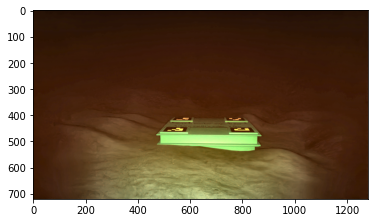

In [3]:


def apply_clahe_rgb_lab(image_path, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Read the RGB image
    img = cv2.imread(image_path)

    # Convert the image to LAB color space
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # Split the LAB image into L, A, and B channels
    l_channel, a_channel, b_channel = cv2.split(lab_img)

    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    # clahe = cv2.createCLAHE()
    
    clahe_l_channel = clahe.apply(l_channel)

    # Merge the CLAHE-enhanced L channel with the original A and B channels
    clahe_lab_img = cv2.merge([clahe_l_channel, a_channel, b_channel])

    # Convert the LAB image back to RGB color space
    clahe_rgb_img = cv2.cvtColor(clahe_lab_img, cv2.COLOR_LAB2BGR)

    # Save the enhanced image
    return img, clahe_rgb_img

input_image_path = '/home/ayon/git/orbslam3_docker/Datasets/EuRoC/MH01/mav0/cam0/data/3004999936.png'

img, clahe_rgb_img = apply_clahe_rgb_lab(input_image_path)
cv2.imshow('a', img)
cv2.imshow('b', clahe_rgb_img)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [13]:
raw_img_dir = '/home/ayon/git/orbslam3_docker/Datasets/EuRoC/MH01/mav0/cam0/data'
output_img_dir = '/home/ayon/git/orbslam3_docker/Datasets/EuRoC/MH06/mav0/cam0/data/'

def create_dataset(raw_img_dir=raw_img_dir, output_img_dir=output_img_dir, process=apply_clahe_rgb):
    img_list = os.listdir(raw_img_dir)

    for imgs in tqdm(img_list):
        input_image_path = os.path.join(raw_img_dir, imgs)
        img, clahe_rgb_img = process(input_image_path, red=True, green=True, blue=True, clip_limit=3.0, tile_grid_size=(8,8))
        # cv2.imshow('a', img)
        # cv2.imshow('b', clahe_rgb_img)

        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        cv2.imwrite(os.path.join(output_img_dir,imgs), clahe_rgb_img)
        
    assert len(os.listdir(raw_img_dir))==len(os.listdir(output_img_dir))
    print('Done!!!!!')

create_dataset()

100%|██████████| 4715/4715 [06:01<00:00, 13.03it/s]

Done!!!!!
